In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ride = "./raw_data/ride_data.csv"
ride_df = pd.read_csv(ride)
ride_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
city = "./raw_data/city_data.csv"
city_df = pd.read_csv(city)
city_df.count()
city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
city_df2 = city_df.groupby(["city"], as_index=False).agg({"driver_count":"sum","type":"min"})
city_df2.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [9]:
merged_df = pd.merge(ride_df,city_df2, how = "outer", on = "city")
merged_df.head(3)


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban


In [10]:
total_ride = len(merged_df["ride_id"])
total_ride

2375

In [11]:

## average fare for the y_axis:
#average_fare = merged_df.groupby(["city"])["fare"].mean()
average_fare = merged_df.groupby(["city"], as_index=False)["fare"].mean().rename(columns={"fare":"ave_fare"})
average_fare.head(3)

,city,ave_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556


In [12]:
total_rides = merged_df.groupby(["city"], as_index=False)["ride_id"].count().rename(columns={"ride_id":"ride_count"})
total_rides.head(3)

,city,ride_count
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9


In [13]:
##To calculate the total number of drivers for the bubble size:
total_drivers = merged_df.groupby(["city"],as_index=False)["driver_count"].count().rename(columns={"driver_count":"drivers"})
total_drivers.head(3)

,city,drivers
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9


In [14]:
#scatter plot y_axis:
Ave_fare = average_fare["ave_fare"]
Ave_fare.head(5)

0    23.928710
1    20.609615
2    37.315556
3    23.625000
4    21.981579
Name: ave_fare, dtype: float64

In [15]:
#Scatter plot x_axis:
Total_rides = total_rides["ride_count"]
Total_rides.head(5)

0    31
1    26
2     9
3    22
4    19
Name: ride_count, dtype: int64

In [17]:
#scatter plot bubble/size:
Total_drivers = total_drivers["drivers"]
Total_drivers

0      31
1      26
2       9
3      22
4      19
5      31
6      15
7      10
8      29
9      12
10     11
11     21
12     25
13     13
14     22
15     28
16     19
17     11
18     10
19      7
20     27
21      8
22     19
23     10
24     24
25      9
26      4
27      6
28     31
29     12
       ..
95     22
96     15
97     26
98      5
99     30
100    34
101    24
102    13
103    26
104    23
105    15
106    16
107    20
108    30
109    24
110    29
111    12
112    21
113     7
114    29
115    14
116    17
117    31
118    18
119    19
120    11
121    31
122    19
123    20
124    24
Name: drivers, dtype: int64

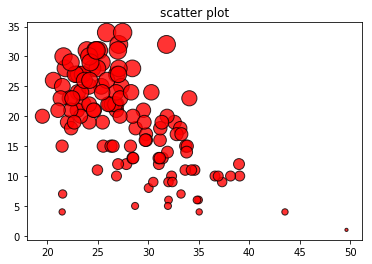

In [22]:
#scatter plot
x_axis = Ave_fare
y_axis = Total_rides

plt.scatter(x_axis, y_axis, marker = "o", facecolor = "red", edgecolor = "black", s = (Total_drivers)*10, alpha = 0.8)

plt.title("scatter plot")

#plt.xlim(0, max(x_axis))
#plt.ylim(0, max(y_axis))
plt.show()

In [ ]:
###--------------------------------------don't worry about the code below--------------------------------------

In [ ]:
## to calculate the total number of rides for each city type: suburban
suburban_city = merged_df[merged_df["type"]=="Suburban"]
suburban_city.head(3)


In [ ]:
## to calculate the total number of rides for each city type: suburban
urban_city = merged_df[merged_df["type"]=="Urban"]
urban_city.head(3)

In [ ]:
ttl_drivers = merged_df["driver_count"].sum()
ttl_drivers

In [ ]:
ttl_fare = merged_df["fare"].sum()
ttl_fare

In [ ]:
city_type = set(merged_df["type"])
city_type

In [ ]:
ttl_fare = sum(merged_df["fare"])
ttl_fare

In [ ]:
city_type = merged_df.groupby("type")["city"].count()
city_type

In [ ]:
#To find the total fare by city type:
ttlFare_type = merged_df.groupby("type")["fare"].sum()
ttlFare_type

In [ ]:
# Total number of rides by city type:
ttl_Ride = merged_df["ride_id"].count()
ttl_Ride

In [ ]:
#total ride by city type
ttlRide_type = merged_df.groupby("type")["ride_id"].count()
ttlRide_type

In [ ]:
ttlDriver_type = merged_df.groupby("type")["driver_count"].sum()
ttlDriver_type